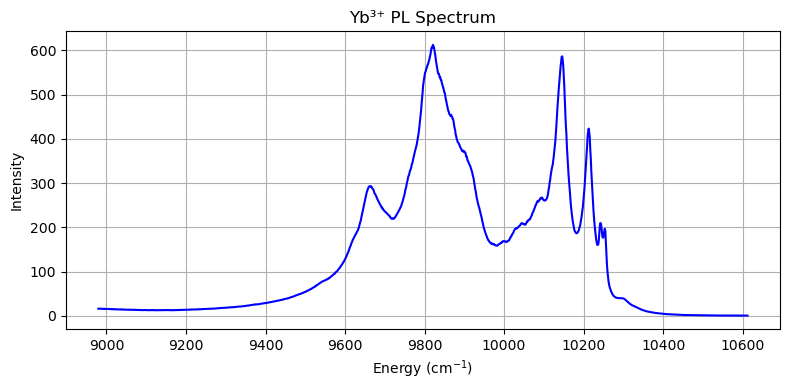

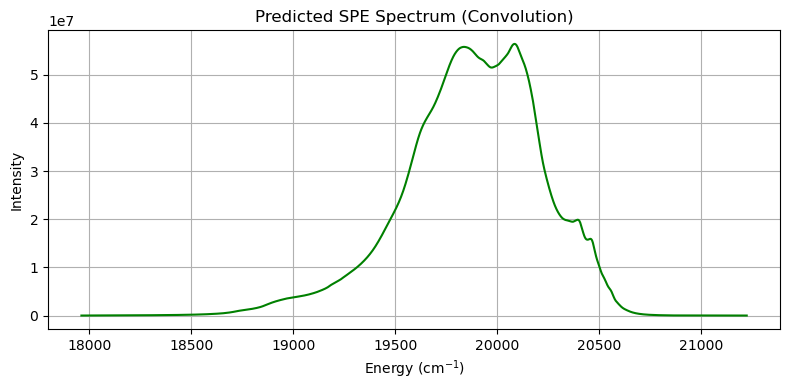

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d

# =======================
# User Input
# =======================
input_file = r"Z:\Jacob\Material YbEr cluster\07142025 RT YbYb cluster PL and TRPL\Cold_PL.csv"
skip_rows = 1  # Skip header
output_suffix = "_SPE.csv"

# =======================
# Load Data
# =======================
data = np.loadtxt(input_file, delimiter=",", skiprows=skip_rows)
energy = data[:, 0]  # in cm^-1
pl = data[:, 1]*0.0884199

# =======================
# Self-Convolution
# =======================
dE = np.mean(np.diff(energy))
E_min = 2 * energy[0]
E_max = 2 * energy[-1]
E_spe = np.arange(E_min, E_max, dE)

spe = np.convolve(pl, pl, mode='full') * dE
E_conv = np.linspace(E_spe[0], E_spe[-1], len(spe))

interp_spe = interp1d(E_conv, spe, bounds_error=False, fill_value=0)
spe_resampled = interp_spe(E_spe)
spe_resampled *=-1

# =======================
# Save Output
# =======================
output_data = np.column_stack((E_spe, spe_resampled))
output_file = os.path.splitext(input_file)[0] + output_suffix
np.savetxt(output_file, output_data, delimiter=",", header="Energy_cm^-1,SPE", comments='')

# =======================
# Plot Input PL Spectrum
# =======================
plt.figure(figsize=(8, 4))
plt.plot(energy, pl, label="Yb PL", color="blue")
plt.xlabel("Energy (cm$^{-1}$)")
plt.ylabel("Intensity")
plt.title("Yb³⁺ PL Spectrum")
plt.grid(True)
plt.tight_layout()

# =======================
# Plot SPE Spectrum
# =======================
plt.figure(figsize=(8, 4))
plt.plot(E_spe, spe_resampled, label="Predicted SPE", color="green")
plt.xlabel("Energy (cm$^{-1}$)")
plt.ylabel("Intensity")
plt.title("Predicted SPE Spectrum (Convolution)")
plt.grid(True)
plt.tight_layout()

plt.show()
